<a href="https://www.kaggle.com/code/jesuisetudiant/freedom-rankings-per-country-2013-2022-analysis?scriptVersionId=120636488" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/freedom-in-the-world-2013-2022/Freedom in the World 2013-2022 Dataset (Ver 2.18.23).csv


## **Read the data file into the dataframe**

In [2]:
filename = '/kaggle/input/freedom-in-the-world-2013-2022/Freedom in the World 2013-2022 Dataset (Ver 2.18.23).csv'
data = pd.read_csv(filename)
data.head()

,Country/Territory,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,F3,F4,F,G1,G2,G3,G4,G,CL,Total
0,Abkhazia,Eurasia,t,2022,PF,5,5,2,2,1,...,1,1,4,1,1,2,1,5,23,40
1,Afghanistan,Asia,c,2022,NF,7,6,0,0,0,...,0,0,0,0,1,0,1,2,9,10
2,Albania,Europe,c,2022,PF,3,3,3,3,3,...,2,3,9,3,2,2,2,9,39,67
3,Algeria,Africa,c,2022,NF,6,5,1,1,1,...,2,2,6,2,2,2,1,7,22,32
4,Andorra,Europe,c,2022,F,1,1,4,4,4,...,4,3,15,4,4,3,4,15,55,93


In [3]:
# Lets check Data Shape
data.shape

(2095, 42)

## **How Many Missing values are in the dataset in each column**

In [4]:
# lets check for missing values
data.isna().sum()

Country/Territory    0
Region               0
C/T                  0
Edition              0
Status               0
PR rating            0
CL rating            0
A1                   0
A2                   0
A3                   0
A                    0
B1                   0
B2                   0
B3                   0
B4                   0
B                    0
C1                   0
C2                   0
C3                   0
C                    0
PR                   0
D1                   0
D2                   0
D3                   0
D4                   0
D                    0
E1                   0
E2                   0
E3                   0
E                    0
F1                   0
F2                   0
F3                   0
F4                   0
F                    0
G1                   0
G2                   0
G3                   0
G4                   0
G                    0
CL                   0
Total                0
dtype: int64

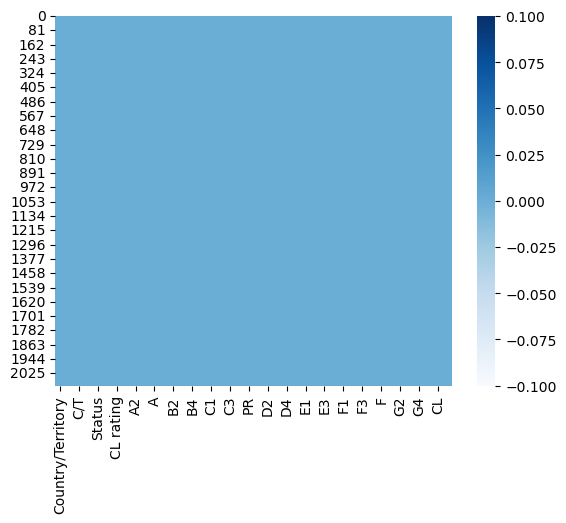

In [5]:
# Lets visualize missing values
sns.heatmap(data.isna(), cmap='Blues')
plt.show()

As None of the Values are Missing

## **Is there any duplicate value in the dataset**

In [6]:
# check for duplicate values in the dataset
data.duplicated().any()

False

Not a single duplictae value exits

In [7]:
# check for data types of each column in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country/Territory  2095 non-null   object
 1   Region             2095 non-null   object
 2   C/T                2095 non-null   object
 3   Edition            2095 non-null   int64 
 4   Status             2095 non-null   object
 5   PR rating          2095 non-null   int64 
 6   CL rating          2095 non-null   int64 
 7   A1                 2095 non-null   int64 
 8   A2                 2095 non-null   int64 
 9   A3                 2095 non-null   int64 
 10  A                  2095 non-null   int64 
 11  B1                 2095 non-null   int64 
 12  B2                 2095 non-null   int64 
 13  B3                 2095 non-null   int64 
 14  B4                 2095 non-null   int64 
 15  B                  2095 non-null   int64 
 16  C1                 2095 non-null   int64 


In [8]:
# we need to convert some of the column data types
# data['Country/Territory'] = data['Country/Territory'].astype(str)
# data['Region'] = data['Region'].astype(str)
# data['C/T'] = data['C/T'].astype(str)
# data['Status'] = data['Status'].astype('category')
data['Edition'] = data['Edition'].astype(int)

## **How Many Country/Territory are Free, Not Free or Partially Free**

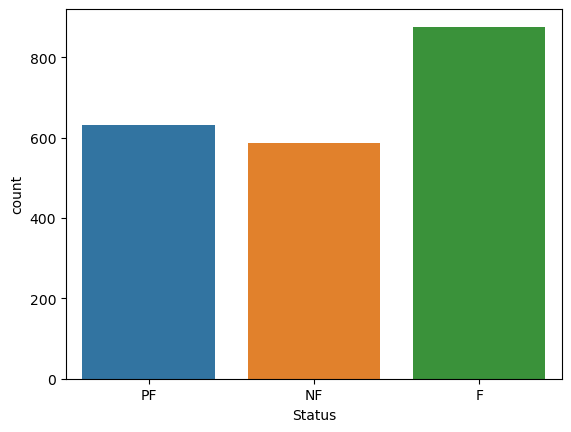

In [9]:
# check for status Column 
sns.countplot(data=data, x='Status')
plt.show()

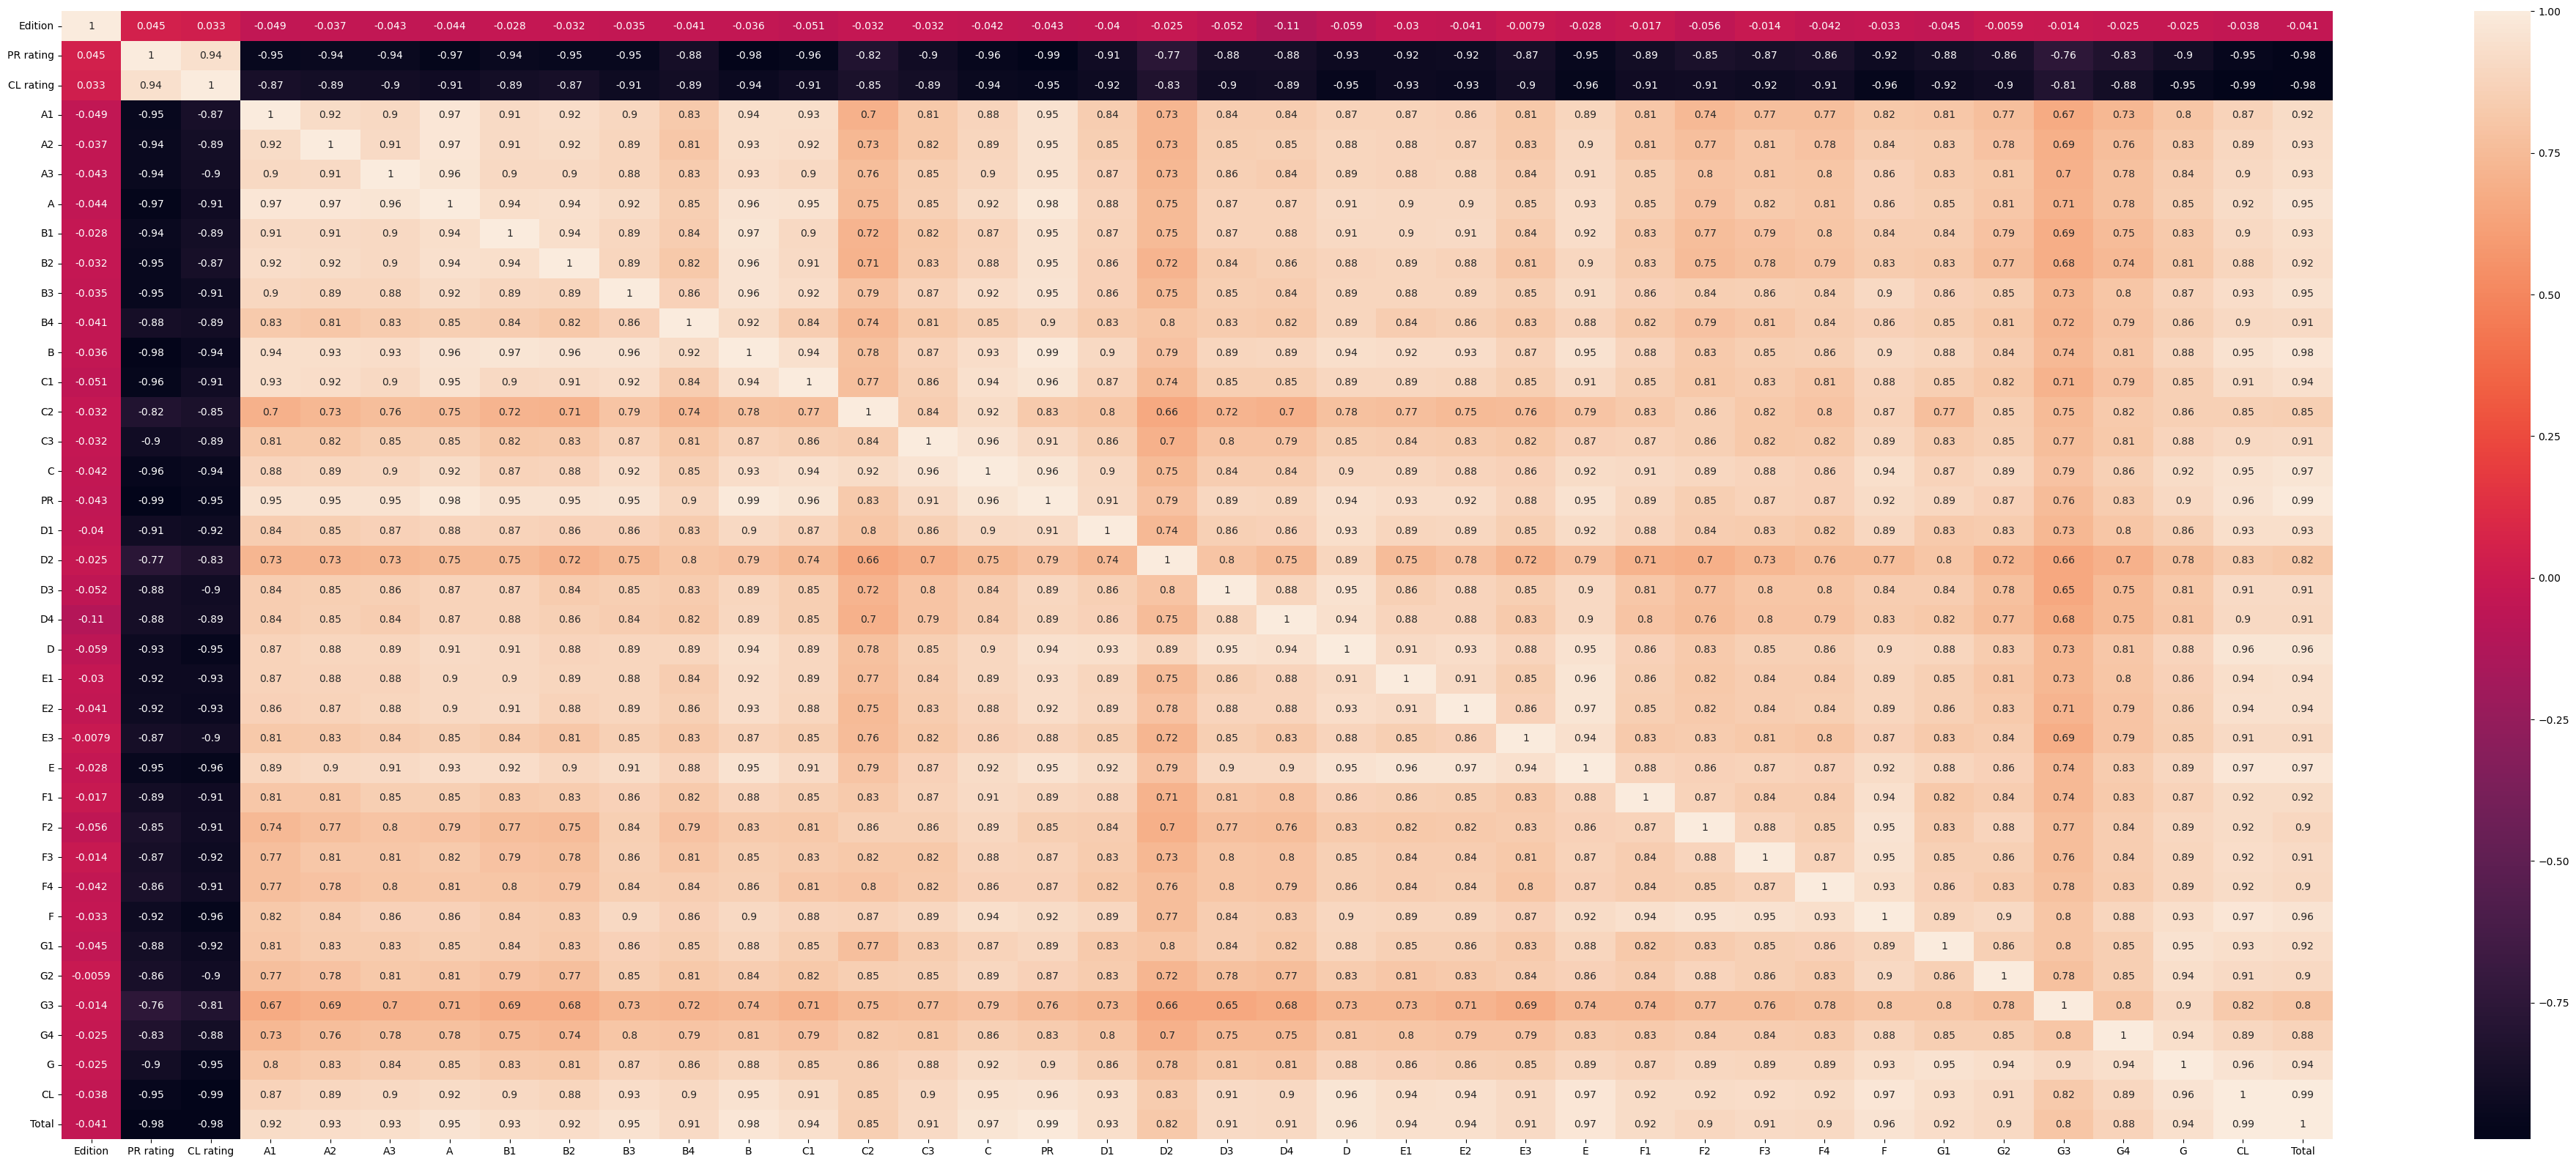

In [10]:
# Lets check correlation between each column in the dataset
plt.figure(figsize=(50,20))
sns.heatmap(data=data.corr(), annot=True)
plt.show()

## **List Top 30 Countries with Highest and Lowest total Freedom Ratings**

In [11]:
# lets groupby dataset on the basis of country and territory
total_rating = data.groupby(['Country/Territory']).sum()['Total'].reset_index()
total_rating.sort_values(by=['Total'], ascending=False, inplace=True)
total_rating_top = total_rating.iloc[:30]
total_rating_bottom = total_rating.tail(30).copy()
total_rating_bottom.sort_values(by=['Total'], inplace=True)
total_rating_bottom.head()

,Country/Territory,Total
180,Syria,4
186,Tibet,10
52,Eastern Donbas,13
57,Eritrea,27
133,North Korea,30


In [12]:
# Bar Chart for Top 30 Countries
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=total_rating_top['Country/Territory'], y=total_rating_top['Total'], text=total_rating_top['Total'], textposition='outside')])
fig.update_layout(title='Top 30 Countries with highest Freedom', xaxis_title="Country/Territory", yaxis_title="Freedom Value")
fig.show()

In [13]:
# Bar chart to show countries with Lowest Freddom rating Overalll
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=total_rating_bottom['Country/Territory'], y=total_rating_bottom['Total'], text=total_rating_bottom['Total'], textposition='outside')])
fig.update_layout(title='Top 30 Countries with Lowest Freedom', xaxis_title="Country/Territory", yaxis_title="Freedom Value")
fig.show()

## **Find total Freedom Ratngs by Region**

In [14]:
# Groupby data on the basis of Region
total_region = data.groupby(['Region']).sum()['Total'].reset_index()
total_region.sort_values(by=['Total'], ascending=False, inplace=True)
total_region.head()

,Region,Total
4,Europe,37327
1,Americas,26225
2,Asia,24970
0,Africa,23862
3,Eurasia,4814


In [15]:
# bar chart for Freedom by Region
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=total_region['Region'], y=total_region['Total'], text=total_region['Total'], textposition='outside')])
fig.update_layout(title='Regions with Freedom Ratings', xaxis_title="Regions", yaxis_title="Freedom Value")
fig.show()

## **Which year has Most and Less freedom Ratings**

In [16]:
total_by_Year = data.groupby(['Edition']).sum()['Total'].reset_index()
total_by_Year.sort_values(by=['Total'], ascending=False, inplace=True)
total_by_Year.head()

,Edition,Total
0,2013,12420
1,2014,12410
2,2015,12381
3,2016,12318
4,2017,12120


In [17]:
# bar chart for Freedom by Region
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=total_by_Year['Edition'], y=total_by_Year['Total'], text=total_by_Year['Total'], textposition='outside')])
fig.update_layout(title='Freedom Ratings with respect to Year', xaxis_title="Years", yaxis_title="Freedom Value")
fig.show()

We can see crelaly that year 2013 had more Freedom than any other year. Year 2022 has less Freddom than all othrs years.

## **Find top 20 country/Territory with Most Freedom rating in 2013**

In [18]:
# For this we will filter the data for the year 2013
data_2013 = data[data['Edition'] == 2013].copy()
data_2013.head()

,Country/Territory,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,F3,F4,F,G1,G2,G3,G4,G,CL,Total
1886,Abkhazia,Eurasia,t,2013,PF,4,5,3,2,2,...,1,1,4,1,1,2,1,5,22,40
1887,Afghanistan,Asia,c,2013,NF,6,6,1,1,1,...,0,1,2,0,1,1,1,3,16,27
1888,Albania,Europe,c,2013,PF,3,3,3,3,2,...,2,3,9,3,2,2,2,9,39,63
1889,Algeria,Africa,c,2013,NF,6,5,1,2,1,...,1,2,5,2,2,2,1,7,24,35
1890,Andorra,Europe,c,2013,F,1,1,4,4,4,...,4,3,15,4,3,4,4,15,57,96


In [19]:
# check data shape
data_2013.shape

(209, 42)

In [20]:
# Check whether all values are unique in Country/territory
data_2013['Country/Territory'].nunique()

209

As we have all unique values in the dataset so we dont need to groupby

In [21]:
data_2013_PR = data_2013[['Country/Territory', 'PR rating']].copy()
data_2013_PR.sort_values(by='PR rating', ascending=False, inplace=True)
data_2013_PR_bottom = data_2013_PR.tail(20)
data_2013_PR = data_2013_PR.head(20)
data_2013_PR.head()

,Country/Territory,PR rating
1940,Equatorial Guinea,7
2064,Syria,7
2017,North Korea,7
1920,Chad,7
1922,China,7


In [22]:
# bar chart for Political rating in 2013 top 20
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=data_2013_PR['Country/Territory'], y=data_2013_PR['PR rating'], text=data_2013_PR['PR rating'], textposition='outside')])
fig.update_layout(title='Top 20 Country/Territory with Most Political Freedom Rating in 2013', xaxis_title="Country/Territory", yaxis_title="PR Rating")
fig.show()

In [23]:
# bar chart for Political Rating Least 20
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=data_2013_PR_bottom['Country/Territory'], y=data_2013_PR_bottom['PR rating'], text=data_2013_PR_bottom['PR rating'], textposition='outside')])
fig.update_layout(title='Top 20 Country/Territory with Least Political Freedom Rating in 2013', xaxis_title="Country/Territory", yaxis_title="PR Rating")
fig.show()

## **What are Top 10 Country/Territory with Most and Least Civil Liabilities in 2013**

In [24]:
# get data
data_2013_CL = data_2013[['Country/Territory', 'CL rating']].copy()
data_2013_CL.sort_values(by='CL rating', ascending=False, inplace=True)
data_2013_CL_bottom = data_2013_CL.tail(10)
data_2013_CL = data_2013_CL.head(10)
data_2013_CL.head()

,Country/Territory,CL rating
1941,Eritrea,7
2086,Uzbekistan,7
2049,Somalia,7
2017,North Korea,7
2060,Sudan,7


In [25]:
# bar chart for Civil Liabilities in 2013 top 10
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=data_2013_CL['Country/Territory'], y=data_2013_CL['CL rating'], text=data_2013_CL['CL rating'], textposition='outside')])
fig.update_layout(title='Top 10 Country/Territory with Most Civil Liabilities Rating Freedom in 2013', xaxis_title="Country/Territory", yaxis_title="CL Rating")
fig.show()

In [26]:
# bar chart for least Civil Liabilities in 2013 top 10
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=data_2013_CL_bottom['Country/Territory'], y=data_2013_CL_bottom['CL rating'], text=data_2013_CL_bottom['CL rating'], textposition='outside')])
fig.update_layout(title='Top 10 Country/Territory with Least Civil Liabilities Rating Freedom in 2013', xaxis_title="Country/Territory", yaxis_title="CL Rating")
fig.show()

## **Top Region having more Total Freddom Value in 2013**

In [27]:
data_2013_Region = data_2013.groupby(['Region']).sum()['Total'].reset_index()
data_2013_Region.sort_values(by='Total', ascending=False, inplace=True)
data_2013_Region.head()

,Region,Total
4,Europe,3802
1,Americas,2721
2,Asia,2498
0,Africa,2482
3,Eurasia,489


In [28]:
# bar chart for Freedom by Region in 2013
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=data_2013_Region['Region'], y=data_2013_Region['Total'], text=data_2013_Region['Total'], textposition='outside')])
fig.update_layout(title='Regions with Freedom Ratings in year 2013', xaxis_title="Regions", yaxis_title="Freedom Value")
fig.show()

## **Top Region having More Freedom Value in 2022**

In [29]:
# For this we will filter the data for the year 2013
data_2022 = data[data['Edition'] == 2022].copy()
data_2022.head()

,Country/Territory,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,F3,F4,F,G1,G2,G3,G4,G,CL,Total
0,Abkhazia,Eurasia,t,2022,PF,5,5,2,2,1,...,1,1,4,1,1,2,1,5,23,40
1,Afghanistan,Asia,c,2022,NF,7,6,0,0,0,...,0,0,0,0,1,0,1,2,9,10
2,Albania,Europe,c,2022,PF,3,3,3,3,3,...,2,3,9,3,2,2,2,9,39,67
3,Algeria,Africa,c,2022,NF,6,5,1,1,1,...,2,2,6,2,2,2,1,7,22,32
4,Andorra,Europe,c,2022,F,1,1,4,4,4,...,4,3,15,4,4,3,4,15,55,93


In [30]:
# Groupby data on basis of region
data_2022_Region = data_2022.groupby(['Region']).sum()['Total'].reset_index()
data_2022_Region.sort_values(by='Total', ascending=False, inplace=True)
data_2022_Region.head()

,Region,Total
4,Europe,3667
1,Americas,2534
2,Asia,2416
0,Africa,2263
3,Eurasia,459


In [31]:
# bar chart for Freedom by Region in 2022
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=data_2022_Region['Region'], y=data_2022_Region['Total'], text=data_2022_Region['Total'], textposition='outside')])
fig.update_layout(title='Regions with Freedom Ratings in year 2022', xaxis_title="Regions", yaxis_title="Freedom Value")
fig.show()

## **Top 20 Country/Territory with Most and Least Political rating Freddom in 2022**

In [32]:
# caluclating data
data_2022_PR = data_2022[['Country/Territory', 'PR rating']].copy()
data_2022_PR.sort_values(by='PR rating', ascending=False, inplace=True)
data_2022_PR_bottom = data_2022_PR.tail(20)
data_2022_PR = data_2022_PR.head(20)
data_2022_PR.head()

,Country/Territory,PR rating
150,Russia,7
52,Eastern Donbas,7
168,South Ossetia,7
28,Burundi,7
164,Somalia,7


In [33]:
# bar chart for Political rating in 2022 top 20
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=data_2022_PR['Country/Territory'], y=data_2022_PR['PR rating'], text=data_2022_PR['PR rating'], textposition='outside')])
fig.update_layout(title='Top 20 Country/Territory with Most Political Freedom Rating in 2022', xaxis_title="Country/Territory", yaxis_title="PR Rating")
fig.show()

In [34]:
# bar chart for Political rating in 2022 bottom 20 
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=data_2022_PR_bottom['Country/Territory'], y=data_2022_PR_bottom['PR rating'], text=data_2022_PR_bottom['PR rating'], textposition='outside')])
fig.update_layout(title='Top 20 Country/Territory with Least Political Freedom Rating in 2022', xaxis_title="Country/Territory", yaxis_title="PR Rating")
fig.show()

## **What are Top 10 Country/Territory with Most and Least Civil Liabilities in 2022**

In [35]:
# get data
data_2022_CL = data_2022[['Country/Territory', 'CL rating']].copy()
data_2022_CL.sort_values(by='CL rating', ascending=False, inplace=True)
data_2022_CL_bottom = data_2022_CL.tail(10)
data_2022_CL = data_2022_CL.head(10)
data_2022_CL.head()

,Country/Territory,CL rating
155,Saudi Arabia,7
33,Central African Republic,7
16,Belarus,7
185,Tibet,7
57,Eritrea,7


In [36]:
# bar chart for Civil Liabilities in 2022 top 10
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=data_2022_CL['Country/Territory'], y=data_2022_CL['CL rating'], text=data_2022_CL['CL rating'], textposition='outside')])
fig.update_layout(title='Top 10 Country/Territory with Most Civil Liabilities Rating Freedom in 2022', xaxis_title="Country/Territory", yaxis_title="CL Rating")
fig.show()

In [37]:
# bar chart for Civil Liabilities in 2022 bottom 10
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=data_2022_CL_bottom['Country/Territory'], y=data_2022_CL_bottom['CL rating'], text=data_2022_CL_bottom['CL rating'], textposition='outside')])
fig.update_layout(title='Top 10 Country/Territory with Least Civil Liabilities Rating Freedom in 2022', xaxis_title="Country/Territory", yaxis_title="CL Rating")
fig.show()

## **Top ten Countries/territory having freedom of expression and beliefs in 2022**

In [38]:
# calculating data 
data_2022_fr = data_2022[['Country/Territory', 'D']].copy()
data_2022_fr.sort_values(by='D', ascending=False, inplace=True)
data_2022_fr_bottom = data_2022_fr.tail(10)
data_2022_fr = data_2022_fr.head(10)
data_2022_fr.head()

,Country/Territory,D
105,Luxembourg,16
163,Solomon Islands,16
190,Trinidad and Tobago,16
35,Chile,16
180,Taiwan,16


In [39]:
# bar chart for Freedom of Expression and Beliefs in 2022 top 10
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=data_2022_fr['Country/Territory'], y=data_2022_fr['D'], text=data_2022_fr['D'], textposition='outside')])
fig.update_layout(title='Top 10 Country/Territory with Most Freedom of Expression and Beliefs Value in 2022', xaxis_title="Country/Territory", yaxis_title="Freedom of Expressions and Beliefs")
fig.show()

In [40]:
# bar chart for Freedom of Expression and Beliefs in 2022 bottom 10
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=data_2022_fr_bottom['Country/Territory'], y=data_2022_fr_bottom['D'], text=data_2022_fr_bottom['D'], textposition='outside')])
fig.update_layout(title='Top 10 Country/Territory with Least Freedom of Expression and Beliefs Value in 2022', xaxis_title="Country/Territory", yaxis_title="Freedom of Expressions and Beliefs")
fig.show()

## **Top Ten Country/Territory with Most and least Personal Autonomy and Individual Rights in 2022**

In [41]:
# get related data
data_2022_ir = data_2022[['Country/Territory', 'G']].copy()
data_2022_ir.sort_values(by='G', ascending=False, inplace=True)
data_2022_ir_bottom = data_2022_ir.tail(10)
data_2022_ir = data_2022_ir.head(10)
data_2022_ir.head()

,Country/Territory,G
105,Luxembourg,16
32,Canada,16
129,New Zealand,16
62,Finland,16
136,Norway,16


In [42]:
# bar chart for Personal Autonomy and Individual Rights in 2022 top 10
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=data_2022_ir['Country/Territory'], y=data_2022_ir['G'], text=data_2022_ir['G'], textposition='outside')])
fig.update_layout(title='Top 10 Country/Territory with Most Personal Autonomy and Individual Rights in 2022', xaxis_title="Country/Territory", yaxis_title="Personal Autonomy and Individual Rights")
fig.show()

In [43]:
# bar chart for Personal Autonomy and Individual Rights in 2022 bottom 10
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=data_2022_ir_bottom['Country/Territory'], y=data_2022_ir_bottom['G'], text=data_2022_ir_bottom['G'], textposition='outside')])
fig.update_layout(title='Top 10 Country/Territory with Least Personal Autonomy and Individual Rights in 2022', xaxis_title="Country/Territory", yaxis_title="Personal Autonomy and Individual Rights")
fig.show()